In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys,os
import csv, math
#sys.path.insert(0, '/users/global/chg/CLUES/imogen_co2/code/subroutines')
from imogen import parabolic, profile, ocean_co2
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(12,5)




In [11]:
cmip5_runs = [['BCC','bcc-csm1-1'],
              ['BCC','bcc-csm1-1-m'],
              ['BNU','BNU-ESM'],
              ['CCCma','CanESM2'],
              ['CMCC','CMCC-CMS'],
              ['CNRM-CERFACS','CNRM-CM5'],
              ['CSIRO-BOM','ACCESS1-0'],
              ['CSIRO-BOM','ACCESS1-3'],
              ['CSIRO-QCCCE','CSIRO-Mk3-6-0'],
              ['INM','inmcm4'],
              ['IPSL','IPSL-CM5A-LR'],
              ['IPSL','IPSL-CM5A-MR'],
              ['IPSL','IPSL-CM5B-LR'],
              ['MIROC','MIROC5'],
              ['MIROC','MIROC-ESM'],
              ['MIROC','MIROC-ESM-CHEM'],
              ['MOHC','HadGEM2-CC'],
              ['MOHC','HadGEM2-ES'],
              ['MPI-M','MPI-ESM-LR'],
              ['MPI-M','MPI-ESM-MR'],
              ['MRI','MRI-CGCM3'],
              ['NASA-GISS','GISS-E2-H'],
              ['NASA-GISS','GISS-E2-H-CC'],
              ['NASA-GISS','GISS-E2-R'],
              ['NASA-GISS','GISS-E2-R-CC'],
              ['NCAR','CCSM4'],
              ['NCC','NorESM1-M'],
              ['NCC','NorESM1-ME'],
              ['NOAA-GFDL','GFDL-CM3'],
              ['NOAA-GFDL','GFDL-ESM2G'],
              ['NOAA-GFDL','GFDL-ESM2M'],
              ['NSF-DOE-NCAR','CESM1-BGC'],
              ['NSF-DOE-NCAR','CESM1-CAM5'],
              ['NSF-DOE-NCAR','CESM1-WACCM']]


In [12]:
#RAD_FORCING_FILE='/users/eow/edwcom/CLIFFTOP/Tprofiles/RCP3PD_MIDYEAR_RADFORCING_mpeg.txt'

SCENARIO_DIR='/users/eow/edwcom/CLIFFTOP/IMOGEN/scenarios/'

#RAD_FORCING_FILE=SCENARIO_DIR+'SSP2-2.6_IMAGE_qnonco2_smooth.txt'
RAD_FORCING_FILE=SCENARIO_DIR+'SSP2-2.6_IMAGE_qnonco2_splice.txt'
CO2_FILE=SCENARIO_DIR+'SSP2-2.6_IMAGE_concs_co2_smooth.txt'
CH4_N2O_FILE=SCENARIO_DIR+'SSP2-2.6_IMAGE_concs_ch4_n2o.txt'
PLOT_TAG='SSP2-2.6_neweqns_1.5deg'
Etminan=True
RCP_RAD_FORCING_FILE=SCENARIO_DIR+'rcp_qnonco2_vn1p0_2.6.txt'

#RAD_FORCING_FILE=SCENARIO_DIR+'rcp_qnonco2_vn1p0_2.6.txt'
#CO2_FILE=SCENARIO_DIR+'rcp2.6_concs_co2_vn1p0.txt'
#CH4_N2O_FILE=SCENARIO_DIR+'rcp2.6_concs_ch4_n2o_vn1p0.txt'
#PLOT_TAG='RCP2.6'
#Etminan=False

out_dir='/users/eow/edwcom/CLIFFTOP/plots/toy_jules/'+PLOT_TAG+'/'
os.system('mkdir -p '+out_dir)





0

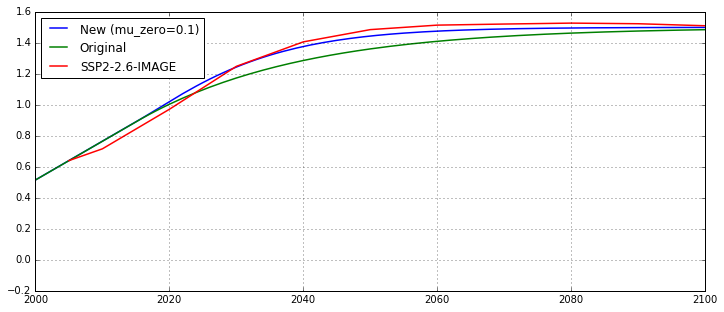

In [13]:
# First set the 3 parameters in the temperature curves
dt_limit=1.5
mu_zero = 0.1
mu_one = 0.000
mu_zero_orig = 0.05
mu_one_orig = 0.000

# Also normalise the curves so that they end up at the current temperature and gradient estimate
beta=0.025                # K/yr
dt_now=0.89
yr_now=2015
end_year=2100
if 'SSP2-2.6' in PLOT_TAG:
    start_year=1850
elif PLOT_TAG=='RCP2.6':
    start_year=1859
n_yr=end_year-start_year+1
#n_yr = 500

delta_temp_global = profile.profile(beta, dt_now, dt_limit, mu_zero, mu_one)
delta_temp_global2 = profile.profile(beta, dt_now, dt_limit, mu_zero_orig, mu_one_orig)
#delta_temp_global3 = profile.profile(beta, dt_now, dt_limit, 0.1, 0)

#n_yr = len(delta_temp_global)
#print(n_yr)
delta_temp_global = delta_temp_global[:n_yr]
delta_temp_global2 = delta_temp_global2[:n_yr]
#delta_temp_global3 = delta_temp_global3[:n_yr]
yr_plot = np.zeros(n_yr)

for i in range(0,n_yr):
    yr_plot[i]=start_year + np.float(i)

    
now_index=np.where(yr_plot==yr_now)[0][0]
SSPstart_index=np.where(yr_plot==2005)[0][0]

plt.plot(yr_plot,delta_temp_global,label='New (mu_zero=0.1)',lw=1.5)
plt.plot(yr_plot,delta_temp_global2,label='Original',lw=1.5)
#plt.plot(yr_plot,delta_temp_global3,label='New (mu_zero=0.1)')


SSP_raw_year=np.array([2005,2010,2020,2030,2040,2050,2060,2070,2080,2090,2100])
SSP_raw_dtemp=np.array([0.913,0.989,1.244,1.521,1.679,1.758,1.787,1.794,1.800,1.796,1.783])

SSP_raw_dtemp= SSP_raw_dtemp-SSP_raw_dtemp[0]+delta_temp_global[SSPstart_index]


plt.plot(SSP_raw_year,SSP_raw_dtemp,label='SSP2-2.6-IMAGE',lw=1.5)


plt.legend(loc=2)
plt.grid(True)
plt.xlim([2000,2100])
plt.show()




In [14]:
l_outTprof=False

if l_outTprof:
    out_Tprof_filename=SCENARIO_DIR+'1p5deg_global_temp_anomaly_vn1p1.dat'
    outf=open(out_Tprof_filename,'w')
    for year,Temp in zip(yr_plot,delta_temp_global):
        line='%4i  %8.4f\n'%(year,Temp)
        outf.write(line)
    outf.close()
    
    

In [15]:
n_cmip5 = len(cmip5_runs)
kappa_all=np.zeros(n_cmip5) ; lambda_l_all=np.zeros(n_cmip5) ; lambda_o_all=np.zeros(n_cmip5)
nu_all = np.zeros(n_cmip5) ; f_all = np.zeros(n_cmip5)



In [16]:
# Read in the EBM parameters
file_kappa = open('/users/global/chg/imogen/build/imogen_vals/kappa.dat')
i_line=0
for line in file_kappa:
    in_vals = line.split()
    if cmip5_runs[i_line][0] == in_vals[1] and cmip5_runs[i_line][1] == in_vals[2] :
        kappa_all[i_line] = np.float(in_vals[0])
    else:
        print('kappa file not lining up OK') ; sys.exit()
    i_line = i_line + 1

file_lambda_o = open('/users/global/chg/imogen/build/imogen_vals/lambda_o.dat')
i_line=0
for line in file_lambda_o:
    in_vals = line.split()
    if cmip5_runs[i_line][0] == in_vals[1] and cmip5_runs[i_line][1] == in_vals[2] :
        lambda_o_all[i_line] = np.float(in_vals[0])
    else:
        print('lambda_o file not lining up OK') ; sys.exit()
    i_line = i_line + 1

file_lambda_l = open('/users/global/chg/imogen/build/imogen_vals/lambda_l.dat')
i_line=0
for line in file_lambda_l:
    in_vals = line.split()
    if cmip5_runs[i_line][0] == in_vals[1] and cmip5_runs[i_line][1] == in_vals[2] :
        lambda_l_all[i_line] = np.float(in_vals[0])
    else:
        print('lambda_l file not lining up OK') ; sys.exit()
    i_line = i_line + 1

file_nu = open('/users/global/chg/imogen/build/imogen_vals/nu.dat')
i_line=0
for line in file_nu:
    in_vals = line.split()
    if cmip5_runs[i_line][0] == in_vals[1] and cmip5_runs[i_line][1] == in_vals[2] :
        nu_all[i_line] = np.float(in_vals[0])
    else:
        print( 'nu file not lining up OK') ; sys.exit()
    i_line = i_line + 1

file_frac = open('/users/global/chg/imogen/build/imogen_vals/ocean_frac.dat')
i_line=0
for line in file_frac:
    in_vals = line.split()
    if cmip5_runs[i_line][0] == in_vals[1] and cmip5_runs[i_line][1] == in_vals[2] :
        f_all[i_line] = np.float(in_vals[0])
    else:
        print('frac file not lining up OK') ; sys.exit()
    i_line = i_line + 1



In [17]:
# Loop over the different GCMs emulated

dq_all=np.zeros([n_yr,n_cmip5]) 
temp_gradient_out_all=np.zeros([n_yr,n_cmip5]) 
#  HadGEM-ES=17, CSIRO-Q=8, NOAA-2G=29
for i_gcm in range(n_cmip5):
    print(i_gcm,':',cmip5_runs[i_gcm])
#for i_gcm in range(0, 3):
    delta_temp_ocean_yearly = delta_temp_global / (f_all[i_gcm] + (1.0-f_all[i_gcm])*nu_all[i_gcm])
    temp_gradient_out = parabolic.parabolic(kappa_all[i_gcm], delta_temp_ocean_yearly)

    print(temp_gradient_out.shape[0])
                 # Holds all CO2 concentrations 
    temp_gradient_out_all[:,i_gcm]=temp_gradient_out

    dq = np.zeros(n_yr)
    # Derive time-evolution of radiative forcing, Q
    factor = (((1.0 - f_all[i_gcm])*lambda_l_all[i_gcm]*nu_all[i_gcm])/f_all[i_gcm]) + lambda_o_all[i_gcm]
    dq = (temp_gradient_out + delta_temp_ocean_yearly*factor)*f_all[i_gcm]
    dq_all[:,i_gcm]=dq
    

0 : ['BCC', 'bcc-csm1-1']


/users/eow/edwcom/miniconda3/lib/python3.5/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:101: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


Heat conservation check final year (%) =  2100 101.741507313
251
1 : ['BCC', 'bcc-csm1-1-m']
Heat conservation check final year (%) =  2100 102.264850764
251
2 : ['BNU', 'BNU-ESM']
Heat conservation check final year (%) =  2100 101.741507313
251
3 : ['CCCma', 'CanESM2']
Heat conservation check final year (%) =  2100 101.53313433
251
4 : ['CMCC', 'CMCC-CMS']
Heat conservation check final year (%) =  2100 101.98882298
251
5 : ['CNRM-CERFACS', 'CNRM-CM5']
Heat conservation check final year (%) =  2100 101.877740219
251
6 : ['CSIRO-BOM', 'ACCESS1-0']
Heat conservation check final year (%) =  2100 101.385746479
251
7 : ['CSIRO-BOM', 'ACCESS1-3']
Heat conservation check final year (%) =  2100 101.468676062
251
8 : ['CSIRO-QCCCE', 'CSIRO-Mk3-6-0']
Heat conservation check final year (%) =  2100 101.477822016
251
9 : ['INM', 'inmcm4']
Heat conservation check final year (%) =  2100 101.028797321
251
10 : ['IPSL', 'IPSL-CM5A-LR']
Heat conservation check final year (%) =  2100 101.544737577
251
11

In [77]:
fa_ocean=np.zeros(20000) ; nfarray = 20000 ; t_ocean_init = 289.28
ocean_area = 3.627E14                          # (m2)
conv = 0.471                                   # From ppm to GtC
q2co2=3.74

# Read in the non-CO2 RF from PIK site
dq_non_co2 = np.zeros(n_yr)
dq_non_co2_ssp = np.zeros(n_yr)
#dq_non_co2_rcp = np.zeros(n_yr)

#ECP method from ssp2-2.6_image data
f_in = open(RAD_FORCING_FILE, 'r')
RF_lines=f_in.readlines()
f_in.close()

rcp_f_in = open(RCP_RAD_FORCING_FILE, 'r')
RCP_RF_lines=rcp_f_in.readlines()
rcp_f_in.close()

co2_f_in=open(CO2_FILE,'r')
CO2_lines=co2_f_in.readlines()
co2_f_in.close()

ch4_n2o_f_in=open(CH4_N2O_FILE,'r')
CH4_N2O_lines=ch4_n2o_f_in.readlines()
ch4_n2o_f_in.close()

co2_ppm_ssp=np.zeros(n_yr)
ch4_ppb_ssp=np.zeros(n_yr)
n2o_ppb_ssp=np.zeros(n_yr)
ssp_year=np.zeros(n_yr)
#rcp_year=np.zeros(n_yr)

for iyr in range(n_yr):
    split=RF_lines[iyr].split()
    dq_non_co2_ssp[iyr]=float(split[1])
        
    split=CO2_lines[iyr].split()
    ssp_year[iyr]=int(split[0])
    co2_ppm_ssp[iyr]=float(split[1])
    
    split=CH4_N2O_lines[iyr].split()
    ch4_ppb_ssp[iyr]=split[1]
    n2o_ppb_ssp[iyr]=split[2]


co2_ppm_pi=co2_ppm_ssp[0]

if Etminan:
    print('here')
    a1=-2.4e-7
    b1=7.2e-4
    c1=-2.1e-4
    Nbar=(n2o_ppb_ssp+n2o_ppb_ssp[0])/2.
    dq_co2_ssp=    np.log(co2_ppm_ssp/co2_ppm_pi)       \
                * (  (a1*((co2_ppm_ssp-co2_ppm_pi)**2))  \
                   + (b1*np.abs(co2_ppm_ssp-co2_ppm_pi)) \
                   + (c1*Nbar) + 5.36 )
else:
    dq_co2_ssp= np.log(co2_ppm_ssp/co2_ppm_pi) * (q2co2/np.log(2.))

rcp_year=np.array([])
dq_non_co2_rcp=np.array([])
for line in RCP_RF_lines:
    split=line.split()
    rcp_year=np.append(rcp_year,int(split[0]))
    dq_non_co2_rcp=np.append(dq_non_co2_rcp,float(split[1]))

now_index=np.where(yr_plot==yr_now)[0][0]
now_index2=np.where(ssp_year==yr_now)[0][0]
print(now_index,now_index2)
    

here
165 165


In [78]:
print(iyr)
print(RAD_FORCING_FILE)

250
/users/eow/edwcom/CLIFFTOP/IMOGEN/scenarios/SSP2-2.6_IMAGE_qnonco2_splice.txt


(242,)
(242,)


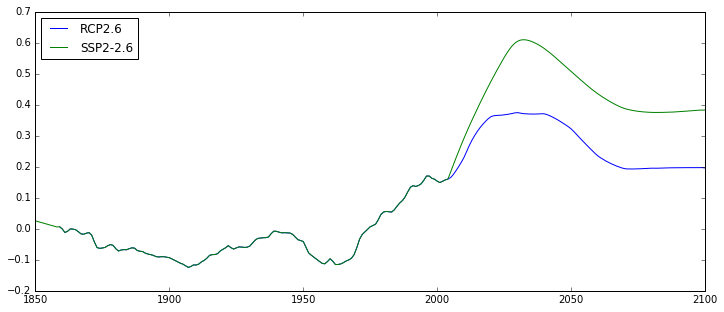

In [79]:
print(dq_non_co2_rcp.shape)
print(rcp_year.shape)
plt.plot(rcp_year,dq_non_co2_rcp,label='RCP2.6')
plt.plot(ssp_year,dq_non_co2_ssp,label='SSP2-2.6')
plt.legend(loc=2)
plt.show()


In [70]:
q2co2=3.74
co2_ppm_pi=co2_ppm_ssp[0]

#array for all temp gradients and rfs
dq_non_co2_all=np.zeros([n_yr,n_cmip5])
dq_co2_all=np.zeros([n_yr,n_cmip5]) 
dq_non_co2_offset_all=np.zeros([n_cmip5])
co2_ppm_all=np.zeros([n_yr,n_cmip5]) 

emiss_invert=np.zeros([n_yr,n_cmip5])                  # Holds the final backed-out emissions (GtC/yr)

#  HadGEM-ES=17, CSIRO-Q=8, NOAA-2G=29
for i_gcm in range(n_cmip5):
    # Now back out CO2 concentrations and non_co2 radiative forcings
    dq=np.copy(dq_all[:,i_gcm])        
        
    #first, historical record, co2 prescribed, hence dqnon_co2=dq-dq_co2_ssp
    dq_non_co2=np.zeros(n_yr)
    dq_non_co2[:now_index+1]=dq[:now_index+1]-dq_co2_ssp[:now_index+1]
    
    # store offset/scale_factor/grad_SF for now_year
    dq_non_co2_offset   = dq_non_co2_ssp[now_index]-dq_non_co2[now_index]
    #print('dq_non_co2_gradscale=',dq_non_co2_gradscale)
    
    dq_non_co2_offset_all[i_gcm]=np.copy(dq_non_co2_offset)
    
    # for remaining period dq_non_co2 is the ssp value - offset
    dq_non_co2[now_index:]=dq_non_co2_ssp[now_index:]-dq_non_co2_offset
    
    
    dq_non_co2_all[:,i_gcm]=np.copy(dq_non_co2)
    
    # Can now Calculate CO2 from dq and dq_non_co2, 
    # we do whole time period to check conservation
    dq_co2 = dq - dq_non_co2
    
    dq_co2_all[:,i_gcm]=np.copy(dq_co2)
    
    if Etminan:
        #print('Etminan')
        co2_ppm_pi=co2_ppm_ssp[0]
        co2_ppm=np.copy(co2_ppm_ssp)
        a1=-2.4e-7
        b1=7.2e-4
        c1=-2.1e-4
        for iyr in range(n_yr):
            co2_OF = np.copy(co2_ppm[iyr-1])
            Nbar=(n2o_ppb_ssp[iyr]+n2o_ppb_ssp[0])*0.5
            itercnt=0
            co2_iter=999.
            while ( (np.abs(co2_iter-co2_OF)>0.001) & (itercnt<=1000) ):
                co2_iter = co2_OF.copy()
                denom = (  (a1*((co2_iter-co2_ppm_pi)**2.)) \
                         + (b1*(co2_iter-co2_ppm_pi))       \
                         + (c1*Nbar)+5.36)
                co2_OF = co2_ppm_pi * np.exp( dq_co2[iyr]/denom )
                itercnt+=1
            co2_ppm[iyr]=np.copy(co2_OF)
            
            itercnt=0
            co2_iter=999.
            while ( (np.abs(co2_iter-co2_SF)>0.001) & (itercnt<=1000) ):
                co2_iter = co2_SF.copy()
                denom = (  (a1*((co2_iter-co2_ppm_pi)**2.)) \
                         + (b1*(co2_iter-co2_ppm_pi))       \
                         + (c1*Nbar)+5.36)
                co2_SF = co2_ppm_pi * np.exp( dq_co2_SF[iyr]/denom )
                itercnt+=1
            co2_ppm_SF[iyr]=np.copy(co2_SF)
            
            itercnt=0
            co2_iter=999.
            while ( (np.abs(co2_iter-co2_GS)>0.001) & (itercnt<=1000) ):
                co2_iter = co2_GS.copy()
                denom = (  (a1*((co2_iter-co2_ppm_pi)**2.)) \
                         + (b1*(co2_iter-co2_ppm_pi))       \
                         + (c1*Nbar)+5.36)
                co2_GS = co2_ppm_pi * np.exp( dq_co2_gradSF[iyr]/denom )
                itercnt+=1
            co2_ppm_gradSF[iyr]=np.copy(co2_GS)
    else:
        co2_ppm = co2_ppm_pi * np.exp((np.log(2.0)*dq_co2)/q2co2)
        
    co2_ppm_all[:,i_gcm]=np.copy(co2_ppm)

    # Now calculate the components of the global carbon cycle
    # First calculate amount that has gone in to the oceans.
    #fa_ocean=np.zeros(20000) ; nfarray = 20000 ; t_ocean_init = 289.28



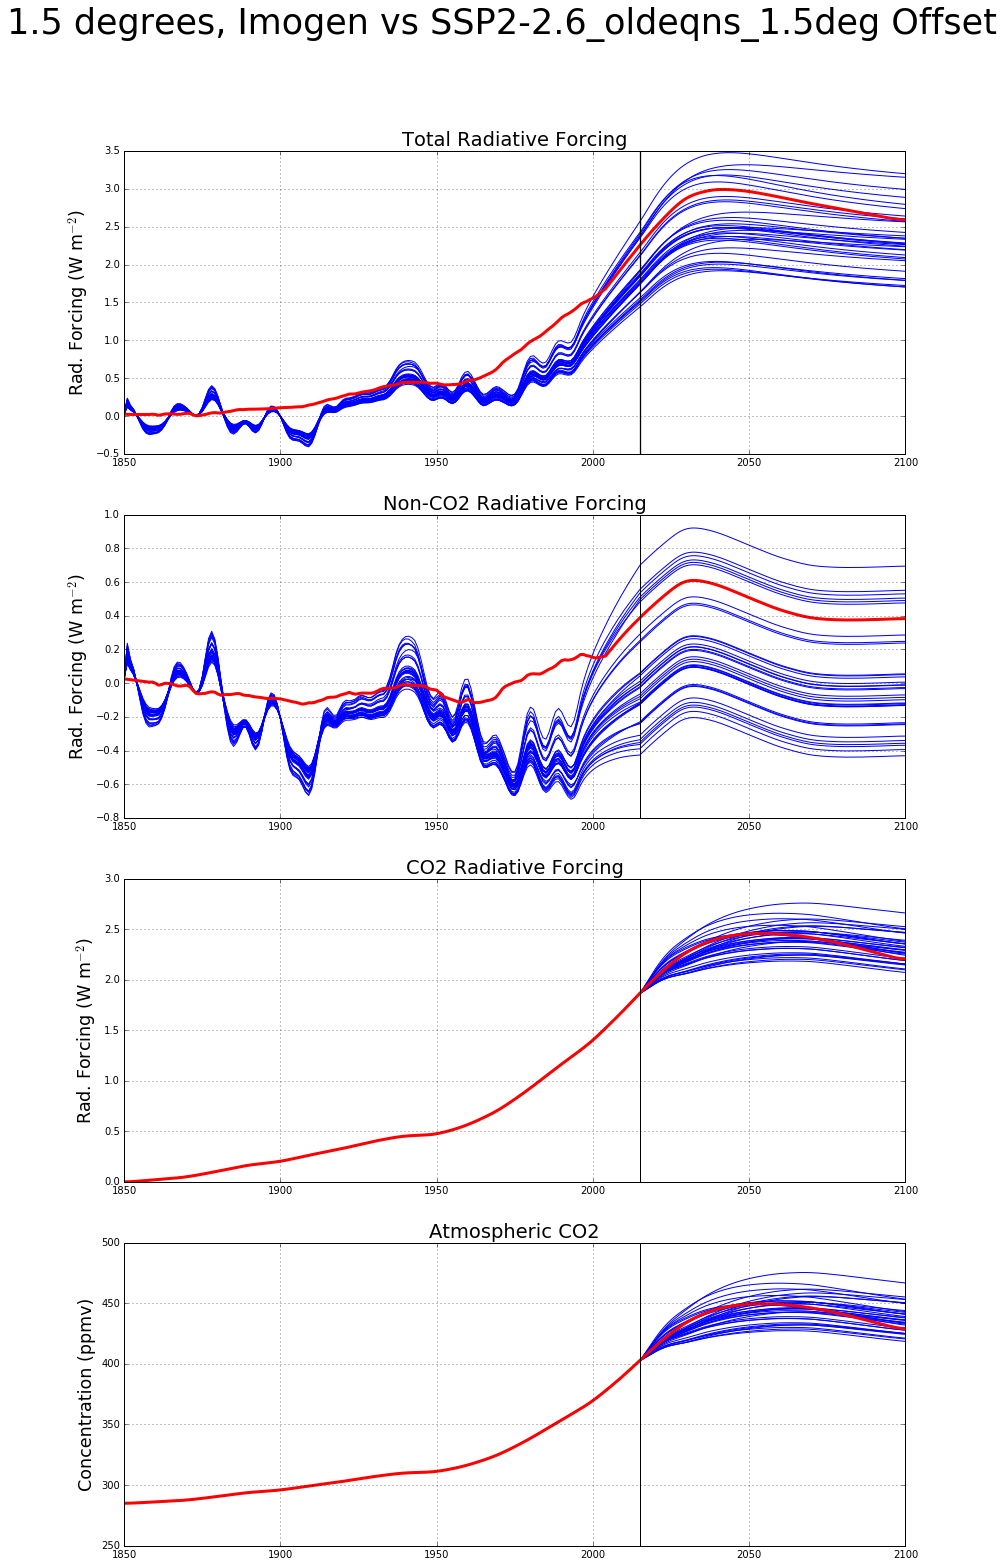

In [71]:
METHOD_DICT={ 'Offset': {'dq_co2':dq_co2_all,        \
                         'dq_non_co2':dq_non_co2_all,\
                         'co2_ppm':co2_ppm_all,      \
                         'colour':'b'},                        \
            } 

plot_index=range(n_cmip5)
#plot_index=np.where(np.max(dq_all,axis=0)>2.5)[0]

for method in ['Offset']:  #METHOD_DICT.keys():
    FIG,AXES=plt.subplots(figsize=[14,25],ncols=1,nrows=4)
    FONTSIZE=35
    colour=METHOD_DICT[method]['colour']
    # Plot total RF in top plot
    ax=AXES[0]
    for i_gcm in plot_index:   #range(n_cmip5):
        ax.plot(ssp_year,dq_all[:,i_gcm],c=colour)

    ax.plot(ssp_year,dq_non_co2_ssp+dq_co2_ssp,c='r',lw=3)
    ax.set_title('Total Radiative Forcing',fontsize=2+FONTSIZE/2.)
    ax.set_ylabel('Rad. Forcing (W m$^{-2}$)',fontsize=FONTSIZE/2.)
    ax.grid(True)
    ax.plot([yr_now,yr_now],ax.get_ylim(),c='k',lw=1.3)
    
    # Plot NON-CO2 radiative forcing on second row
    ax=AXES[1]
    for i_gcm in plot_index:   #range(n_cmip5):
        ax.plot(yr_plot,METHOD_DICT[method]['dq_non_co2'][:,i_gcm],c=colour)
    ax.plot(yr_plot,dq_non_co2_ssp, c='r',lw=3)
    ax.grid(True)
    ax.plot([yr_now,yr_now],ax.get_ylim(),c='k')
    ax.set_title('Non-CO2 Radiative Forcing',fontsize=2+FONTSIZE/2.)
    ax.set_ylabel('Rad. Forcing (W m$^{-2}$)',fontsize=FONTSIZE/2.)
    
    # Plot CO2 radiative forcing on third row
    ax=AXES[2]
    for i_gcm in plot_index:   #range(n_cmip5):
        ax.plot(yr_plot,METHOD_DICT[method]['dq_co2'][:,i_gcm],c=colour)
    ax.plot(yr_plot,dq_co2_ssp, c='r',lw=3)
    ax.grid(True)
    ax.plot([yr_now,yr_now],ax.get_ylim(),c='k')
    ax.set_title('CO2 Radiative Forcing',fontsize=2+FONTSIZE/2.)
    ax.set_ylabel('Rad. Forcing (W m$^{-2}$)',fontsize=FONTSIZE/2.)
    
    # Plot CO2 concentration on third row
    ax=AXES[3]
    for i_gcm in plot_index:   #range(n_cmip5):
        ax.plot(yr_plot,METHOD_DICT[method]['co2_ppm'][:,i_gcm],c=colour)
    ax.plot(yr_plot,co2_ppm_ssp, c='r',lw=3)
    ax.grid(True)
    ax.plot([yr_now,yr_now],ax.get_ylim(),c='k')
    ax.set_title('Atmospheric CO2',fontsize=2+FONTSIZE/2.)
    ax.set_ylabel('Concentration (ppmv)',fontsize=FONTSIZE/2.)
    
    FIG.suptitle('1.5 degrees, Imogen vs '+PLOT_TAG+' '+method,fontsize=FONTSIZE)
    FIG.savefig(out_dir+method+'_RFbreakdown.png',bbox_inches='tight')
    plt.show()


In [ ]:
print(dq_non_co2_gradscale)

print(dq_non_co2_ssp_grad[now_index])
print(dq_non_co2_grad[now_index])

print(dq_non_co2_gradSF[now_index:now_index+2])

print(dq_non_co2_ssp[now_index:now_index+2])

print( dq_non_co2_ssp[now_index]-dq_non_co2_ssp[now_index-1] )
print( dq_non_co2[now_index]-dq_non_co2[now_index-1]   )
   
print(Etminan)

In [ ]:

plt.figure(figsize=[12,6])
#plt.plot(ssp_year,dq_co2_ssp,label='SSP-co2 RF')
#plt.plot(ssp_year,dq_non_co2_ssp,label='SSP-nonco2 RF')
for i_gcm in range(n_cmip5):
    if i_gcm==0:
        plt.plot(ssp_year,dq_all[:,i_gcm],label='IMOGEN RF',c='b')
    else:
        plt.plot(ssp_year,dq_all[:,i_gcm],c='b')

plt.plot(ssp_year,dq_non_co2_ssp+dq_co2_ssp,label=PLOT_TAG+' RF',c='r',lw=3)
plt.title('1.5 degrees, Imogen vs '+PLOT_TAG+' total Radiative Forcing',fontsize=16)
plt.legend(loc=2)
plt.ylabel('Rad. Forcing (W m$^{-2}$)',fontsize=14)
plt.grid(True)
plt.plot([yr_now,yr_now],plt.ylim(),c='k')
plt.savefig(out_dir+'Total_RadForce.png')
plt.show()




In [ ]:

fig,ax=plt.subplots(figsize=[12,5])


ax.set_ylim(-0.5,2.5)
ax.set_ylabel('Delta Global Temperature (K)',fontsize=14)

ax2=ax.twinx()
ax2.set_ylabel('Rad. Forcing (W m$^{-2}$)',fontsize=14)
ax2.set_zorder(0)
ax2.set_ylim(-1.,5.)

ax.set_zorder(1)
ax.patch.set_visible(False)
ax.grid(True)

for i_gcm in range(n_cmip5):
    if i_gcm==0:
        ax2.plot(ssp_year,dq_all[:,i_gcm],label='IMOGEN- Rad. Force',c='b')
    else:
        ax2.plot(ssp_year,dq_all[:,i_gcm],c='b')

ax.plot(yr_plot,delta_temp_global,label='Delta Global Temperature',c='r',lw=4,zorder=5)
handles1,labels1=ax.get_legend_handles_labels()
handles2,labels2=ax2.get_legend_handles_labels()


ax.legend(handles1+handles2,labels1+labels2,loc=2)

plt.plot([yr_now,yr_now],plt.ylim(),c='k')

fig.savefig(out_dir+'TotalRadForce_DeltaT.png')
plt.show()



In [ ]:
print(out_dir)

In [ ]:
plt.figure(figsize=[12,15])
plt.subplot(3,1,1)
for i_gcm in range(n_cmip5):
    if i_gcm==0:
        plt.plot(yr_plot,dq_non_co2_all[:,i_gcm], c='b',
                     label='IMOGEN non CO2 RF')
    else:
        plt.plot(yr_plot,dq_non_co2_all[:,i_gcm], c='b')
        
plt.plot(yr_plot,dq_non_co2_ssp, label=PLOT_TAG+' non co2 RF',c='r',lw=3)
plt.grid(True)
plt.plot([yr_now,yr_now],plt.ylim(),c='k')
plt.ylabel('Rad. Forcing (W m$^{-2}$)',fontsize=14)
plt.legend(loc=2)

plt.subplot(3,1,2)
for i_gcm in range(n_cmip5):
    if i_gcm==0:
        plt.plot(yr_plot,dq_non_co2_SF_all[:,i_gcm], c='g',
                     label='IMOGEN non CO2 RF - ScaleFactor')
    else:
        plt.plot(yr_plot,dq_non_co2_SF_all[:,i_gcm], c='g')
        
plt.plot(yr_plot,dq_non_co2_ssp, label=PLOT_TAG+' non co2 RF',c='r',lw=3)
plt.grid(True)
plt.plot([yr_now,yr_now],plt.ylim(),c='k')
plt.ylabel('Rad. Forcing (W m$^{-2}$)',fontsize=14)
plt.legend(loc=2)

plt.subplot(3,1,3)
for i_gcm in range(n_cmip5):
    if i_gcm==0:
        plt.plot(yr_plot,dq_non_co2_gradSF_all[:,i_gcm], c='darkorange',
                     label='IMOGEN non CO2 RF - GradScale')
    else:
        plt.plot(yr_plot,dq_non_co2_gradSF_all[:,i_gcm], c='darkorange')
        
plt.plot(yr_plot,dq_non_co2_ssp, label=PLOT_TAG+' non co2 RF',c='r',lw=3)
plt.grid(True)
plt.ylabel('Rad. Forcing (W m$^{-2}$)',fontsize=14)
plt.legend(loc=2)
plt.plot([yr_now,yr_now],plt.ylim(),c='k')

plt.suptitle('1.5 degrees, Imogen vs '+PLOT_TAG+' total non-CO2 Radiative Forcing',fontsize=16)

plt.savefig(out_dir+'NonCO2_RadForce.png')
plt.show()



In [ ]:
plt.figure(figsize=[12,15])
plt.subplot(3,1,1)
for i_gcm in range(n_cmip5):
    if i_gcm==0:
        plt.plot(yr_plot,dq_co2_all[:,i_gcm], c='b',
                     label='IMOGEN CO2 RF')
    else:
        plt.plot(yr_plot,dq_co2_all[:,i_gcm], c='b')
        
plt.plot(yr_plot,dq_co2_ssp, label=PLOT_TAG+' co2 RF',c='r',lw=3)
plt.grid(True)
plt.plot([yr_now,yr_now],plt.ylim(),c='k')
plt.ylabel('Rad. Forcing (W m$^{-2}$)',fontsize=14)
plt.legend(loc=2)

plt.subplot(3,1,2)
for i_gcm in range(n_cmip5):
    if i_gcm==0:
        plt.plot(yr_plot,dq_co2_SF_all[:,i_gcm], c='g',
                     label='IMOGEN CO2 RF - ScaleFactor')
    else:
        plt.plot(yr_plot,dq_co2_SF_all[:,i_gcm], c='g')
        
plt.plot(yr_plot,dq_co2_ssp, label=PLOT_TAG+' co2 RF',c='r',lw=3)
plt.grid(True)
plt.plot([yr_now,yr_now],plt.ylim(),c='k')
plt.ylabel('Rad. Forcing (W m$^{-2}$)',fontsize=14)
plt.legend(loc=2)

plt.subplot(3,1,3)
for i_gcm in range(n_cmip5):
    if i_gcm==0:
        plt.plot(yr_plot,dq_co2_gradSF_all[:,i_gcm], c='darkorange',
                     label='IMOGEN CO2 RF - GradScale')
    else:
        plt.plot(yr_plot,dq_co2_gradSF_all[:,i_gcm], c='darkorange')
        
plt.plot(yr_plot,dq_co2_ssp, label=PLOT_TAG+' co2 RF',c='r',lw=3)
plt.grid(True)
plt.ylabel('Rad. Forcing (W m$^{-2}$)',fontsize=14)
plt.legend(loc=2)
plt.plot([yr_now,yr_now],plt.ylim(),c='k')

plt.suptitle('1.5 degrees, Imogen vs '+PLOT_TAG+' total CO2 Radiative Forcing',fontsize=16)

plt.savefig(out_dir+'CO2_RadForce.png')
plt.show()



In [ ]:
plt.figure(figsize=[12,15])
plt.subplot(3,1,1)
for i_gcm in range(n_cmip5):
    if i_gcm==0:
        plt.plot(yr_plot,co2_ppm_all[:,i_gcm], c='b',
                     label='IMOGEN CO2')
    else:
        plt.plot(yr_plot,co2_ppm_all[:,i_gcm], c='b')
        
plt.plot(yr_plot,co2_ppm_ssp, label=PLOT_TAG+' CO2',c='r',lw=3)
plt.grid(True)
plt.plot([yr_now,yr_now],plt.ylim(),c='k')
plt.ylabel('Atmospheric CO2 (ppmv)',fontsize=14)
plt.legend(loc=2)

plt.subplot(3,1,2)
for i_gcm in range(n_cmip5):
    if i_gcm==0:
        plt.plot(yr_plot,co2_ppm_SF_all[:,i_gcm], c='g',
                     label='IMOGEN CO2 - ScaleFactor')
    else:
        plt.plot(yr_plot,co2_ppm_SF_all[:,i_gcm], c='g')
        
plt.plot(yr_plot,co2_ppm_ssp, label=PLOT_TAG+' CO2',c='r',lw=3)
plt.grid(True)
plt.plot([yr_now,yr_now],plt.ylim(),c='k')
plt.ylabel('Atmospheric CO2 (ppmv)',fontsize=14)
plt.legend(loc=2)


plt.subplot(3,1,3)
for i_gcm in range(n_cmip5):
    if i_gcm==0:
        plt.plot(yr_plot,co2_ppm_gradSF_all[:,i_gcm], c='darkorange',
                     label='IMOGEN CO2 - GradScale')
    else:
        plt.plot(yr_plot,co2_ppm_gradSF_all[:,i_gcm], c='darkorange')
        
plt.plot(yr_plot,co2_ppm_ssp, label=PLOT_TAG+' CO2',c='r',lw=3)
plt.grid(True)
plt.plot([yr_now,yr_now],plt.ylim(),c='k')
plt.ylabel('Atmospheric CO2 (ppmv)',fontsize=14)
plt.legend(loc=2)

plt.suptitle('1.5 degrees, Imogen vs '+PLOT_TAG+' total CO2 Concentration',fontsize=16)

plt.savefig(out_dir+'CO2_Concentration.png')
plt.show()


In [ ]:

plot_index=np.where(np.max(dq_all,axis=0)>2.5)[0]
print(plot_index)

print(out_dir)

In [ ]:
# Plot a single run:

dq_nonco2_residual=dq_non_co2-dq_non_co2_ssp

#plt.plot(ssp_year[:now_index],dq_co2_ssp[:now_index],label='SSP-co2 RF')
#plt.plot(ssp_year[:now_index],dq_non_co2_ssp[:now_index],label='SSP-nonco2 RF')
#plt.plot(ssp_year[:now_index],dq_non_co2_ssp[:now_index]+dq_co2_ssp[:now_index],label='SSP RF')
#plt.plot(ssp_year[:now_index],dq[:now_index],label='IMOGEN RF')
#plt.plot(yr_plot[:now_index],delta_temp_global[:now_index],label='dtemp_global')
plt.figure(figsize=[12,6])
plt.plot(ssp_year,dq_co2_ssp,label='SSP-co2 RF')
plt.plot(ssp_year,dq_non_co2_ssp,label='SSP-nonco2 RF')
plt.plot(ssp_year,dq_non_co2_ssp+dq_co2_ssp,label='SSP RF')
plt.plot(ssp_year,dq,label='IMOGEN RF')
plt.legend(loc=2)
plt.grid(True)
plt.show()

#plt.plot(yr_plot[:now_index],dq_non_co2[:now_index], label='IMOGEN non co2 RF')
#plt.plot(yr_plot[:now_index],dq_non_co2_ssp[:now_index], label='SSP non co2 RF')
#plt.plot(yr_plot[:now_index],dq_nonco2_residual[:now_index], label='residual')
plt.figure(figsize=[12,6])
plt.plot(yr_plot,dq_non_co2, label='IMOGEN non co2 RF')
plt.plot(yr_plot,dq_non_co2_ssp, label='SSP non co2 RF')
plt.plot(yr_plot,dq_nonco2_residual, label='residual')
plt.plot(yr_plot,dq_non_co2_SF, label='IMOGEN non co2 RF - SF', ls='--',lw=1.5)
plt.grid(True)
plt.legend(loc=2)
plt.show()



plt.figure(figsize=[12,6])
plt.plot(ssp_year[:],co2_ppm_ssp[:],label='CO2 - SSP')
plt.plot(yr_plot[:],co2_ppm[:],label='CO2 - Imogen')
plt.plot(yr_plot[:],co2_ppm_SF[:],label='CO2 - Imogen SF', ls='--', lw=1.5)
plt.grid(True)
plt.legend(loc=2)
plt.show()

In [ ]:
np.save('output/emiss_invert_running.npy', emiss_invert_running)
np.save('output/delta_temp_global.npy', delta_temp_global)
np.save('output/dq_all.npy', dq_all)
np.save('output/co2_ppm_all.npy', co2_ppm_all)



In [15]:
iyr=240
co2_iter=999.
co2 = co2_ppm_ssp[iyr-1]
dq_test=dq_co2_ssp_etmi[iyr]
co2_ppm_pi=co2_ppm_ssp[0]
a1=-2.4e-7
b1=7.2e-4
c1=-2.1e-4
Nbar=(n2o_ppb_ssp[iyr]+n2o_ppb_ssp[0])*0.5
itercnt=0
print(co2)
while ( (np.abs(co2_iter-co2)>0.001) & (itercnt<=1000) ):
    co2_iter = co2
    denom =  ((a1*((co2_iter-co2_ppm_pi)**2.)) + (b1*(co2_iter-co2_ppm_pi)) +(c1*Nbar)+5.36)
    co2 = co2_ppm_pi * np.exp( dq_test/denom )
    print(itercnt,co2)
    itercnt+=1
print(co2_ppm_ssp[iyr])
    

434.98409
0 434.301006167
1 434.316012697
2 434.315682908
434.31569


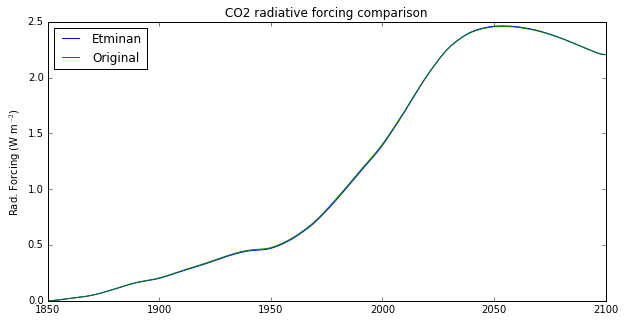

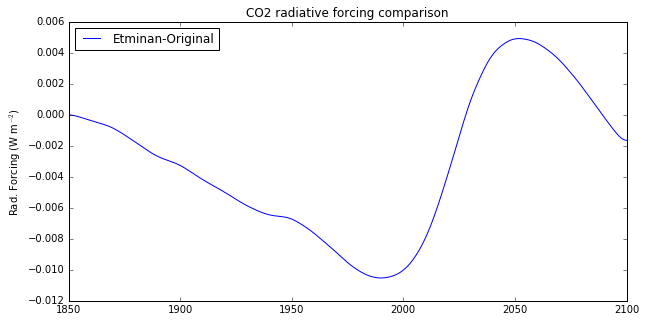

In [80]:
co2_ppm_pi=co2_ppm_ssp[0]
a1=-2.4e-7
b1=7.2e-4
c1=-2.1e-4
Nbar=(n2o_ppb_ssp+n2o_ppb_ssp[0])*0.5

etmi_factor = (  (a1*((co2_ppm_ssp-co2_ppm_pi)**2))  \
               + (b1*(co2_ppm_ssp-co2_ppm_pi)) \
               + (c1*Nbar) \
               +  5.36 )

dq_co2_ssp_etmi =   np.log(co2_ppm_ssp/co2_ppm_pi)       \
                   * etmi_factor


dq_co2_ssp_orig= np.log(co2_ppm_ssp/co2_ppm_pi) * (q2co2/np.log(2.))

#print(q2co2/np.log(2.))
#print(etmi_factor)


plt.figure(figsize=[10,5])
plt.plot(yr_plot,dq_co2_ssp_etmi,label='Etminan')
plt.plot(yr_plot,dq_co2_ssp_orig,label='Original')
plt.legend(loc=2)
plt.title('CO2 radiative forcing comparison')
plt.ylabel('Rad. Forcing (W m$^{-2}$)')
plt.show()

plt.figure(figsize=[10,5])
plt.plot(yr_plot,dq_co2_ssp_etmi-dq_co2_ssp_orig,label='Etminan-Original')
plt.legend(loc=2)
plt.title('CO2 radiative forcing comparison')
plt.ylabel('Rad. Forcing (W m$^{-2}$)')
plt.show()


In [18]:
#array for all temp gradients and rfs
dq_non_co2_all=np.zeros([n_yr,n_cmip5])
dq_co2_all=np.zeros([n_yr,n_cmip5]) 
dq_non_co2_offset_all=np.zeros([n_cmip5])
co2_ppm_all=np.zeros([n_yr,n_cmip5]) 

dq_non_co2_SF_all=np.zeros([n_yr,n_cmip5]) 
dq_co2_SF_all=np.zeros([n_yr,n_cmip5]) 
dq_non_co2_scalefact_all=np.zeros([n_cmip5])
co2_ppm_SF_all=np.zeros([n_yr,n_cmip5]) 

dq_non_co2_gradSF_all=np.zeros([n_yr,n_cmip5]) 
dq_co2_gradSF_all=np.zeros([n_yr,n_cmip5]) 
dq_non_co2_gradscale_all=np.zeros([n_cmip5])
co2_ppm_gradSF_all=np.zeros([n_yr,n_cmip5]) 

dq_non_co2_OFrelax_all=np.zeros([n_yr,n_cmip5]) 
dq_co2_OFrelax_all=np.zeros([n_yr,n_cmip5]) 
dq_non_co2_offsetrelax_all=np.zeros([n_yr,n_cmip5])
co2_ppm_OFrelax_all=np.zeros([n_yr,n_cmip5]) 

emiss_invert=np.zeros([n_yr,n_cmip5])                  # Holds the final backed-out emissions (GtC/yr)

#  HadGEM-ES=17, CSIRO-Q=8, NOAA-2G=29
for i_gcm in range(n_cmip5):
    # Now back out CO2 concentrations and non_co2 radiative forcings
    dq=np.copy(dq_all[:,i_gcm])        
        
    #first, historical record, co2 prescribed, hence dqnon_co2=dq-dq_co2_ssp
    dq_non_co2=np.zeros(n_yr)
    dq_non_co2[:now_index+1]=dq[:now_index+1]-dq_co2_ssp[:now_index+1]
    dq_non_co2_SF=np.copy(dq_non_co2)
    dq_non_co2_gradSF=np.copy(dq_non_co2)
    
    # store offset/scale_factor/grad_SF for now_year
    dq_non_co2_offset   = dq_non_co2_ssp[now_index]-dq_non_co2[now_index]
    dq_non_co2_scalefact= dq_non_co2_ssp[now_index]/dq_non_co2[now_index]
    dq_non_co2_gradscale= (dq_non_co2_ssp[now_index]-dq_non_co2_ssp[now_index-1])/ \
                          (dq_non_co2[now_index]-dq_non_co2[now_index-1])
    
    #print('dq_non_co2_offset=',dq_non_co2_offset)
    #print('dq_non_co2_scalefact=',dq_non_co2_scalefact)
    #print('dq_non_co2_gradscale=',dq_non_co2_gradscale)
    
    dq_non_co2_offset_all[i_gcm]=np.copy(dq_non_co2_offset)
    dq_non_co2_scalefact_all[i_gcm]=np.copy(dq_non_co2_scalefact)
    dq_non_co2_gradscale_all[i_gcm]=np.copy(dq_non_co2_gradscale)
    
    # for remaining period dq_non_co2 is the ssp value - offset
    dq_non_co2[now_index:]=dq_non_co2_ssp[now_index:]-dq_non_co2_offset
    # or scale factor
    dq_non_co2_SF[now_index:]=dq_non_co2_ssp[now_index:]/dq_non_co2_scalefact
    
    # or gradient scale factor:
    dq_non_co2_ssp_grad = dq_non_co2_ssp[1:]-dq_non_co2_ssp[:-1]
    dq_non_co2_grad     = dq_non_co2_ssp_grad/dq_non_co2_gradscale
    for i_yr in range(now_index,n_yr-1):
        dq_non_co2_gradSF[i_yr+1]=dq_non_co2_gradSF[i_yr]+dq_non_co2_grad[i_yr]
    
    dq_non_co2_all[:,i_gcm]=np.copy(dq_non_co2)
    dq_non_co2_SF_all[:,i_gcm]=np.copy(dq_non_co2_SF)
    dq_non_co2_gradSF_all[:,i_gcm]=np.copy(dq_non_co2_gradSF)
        
    # Can now Calculate CO2 from dq and dq_non_co2, 
    # we do whole time period to check conservation
    dq_co2 = dq - dq_non_co2
    dq_co2_SF = dq - dq_non_co2_SF
    dq_co2_gradSF = dq - dq_non_co2_gradSF
    
    dq_co2_all[:,i_gcm]=np.copy(dq_co2)
    dq_co2_SF_all[:,i_gcm]=np.copy(dq_co2_SF)
    dq_co2_gradSF_all[:,i_gcm]=np.copy(dq_co2_gradSF)
    
    if Etminan:
        co2_ppm_pi=co2_ppm_ssp[0]
        co2_ppm=np.copy(co2_ppm_ssp)
        co2_ppm_SF=np.copy(co2_ppm_ssp)
        co2_ppm_gradSF=np.copy(co2_ppm_ssp)
        a1=-2.4e-7
        b1=7.2e-4
        c1=-2.1e-4
        for iyr in range(n_yr):
            co2_OF = np.copy(co2_ppm[iyr-1])
            co2_SF = np.copy(co2_ppm_SF[iyr-1])
            co2_GS = np.copy(co2_ppm_gradSF[iyr-1])
            Nbar=(n2o_ppb_ssp[iyr]+n2o_ppb_ssp[0])*0.5
            itercnt=0
            co2_iter=999.
            while ( (np.abs(co2_iter-co2_OF)>0.001) & (itercnt<=1000) ):
                co2_iter = co2_OF.copy()
                denom = (  (a1*((co2_iter-co2_ppm_pi)**2.)) \
                         + (b1*(co2_iter-co2_ppm_pi))       \
                         + (c1*Nbar)+5.36)
                co2_OF = co2_ppm_pi * np.exp( dq_co2[iyr]/denom )
                itercnt+=1
            co2_ppm[iyr]=np.copy(co2_OF)
            
            itercnt=0
            co2_iter=999.
            while ( (np.abs(co2_iter-co2_SF)>0.001) & (itercnt<=1000) ):
                co2_iter = co2_SF.copy()
                denom = (  (a1*((co2_iter-co2_ppm_pi)**2.)) \
                         + (b1*(co2_iter-co2_ppm_pi))       \
                         + (c1*Nbar)+5.36)
                co2_SF = co2_ppm_pi * np.exp( dq_co2_SF[iyr]/denom )
                itercnt+=1
            co2_ppm_SF[iyr]=np.copy(co2_SF)
            
            itercnt=0
            co2_iter=999.
            while ( (np.abs(co2_iter-co2_GS)>0.001) & (itercnt<=1000) ):
                co2_iter = co2_GS.copy()
                denom = (  (a1*((co2_iter-co2_ppm_pi)**2.)) \
                         + (b1*(co2_iter-co2_ppm_pi))       \
                         + (c1*Nbar)+5.36)
                co2_GS = co2_ppm_pi * np.exp( dq_co2_gradSF[iyr]/denom )
                itercnt+=1
            co2_ppm_gradSF[iyr]=np.copy(co2_GS)
    else:
        co2_ppm = co2_ppm_pi * np.exp((np.log(2.0)*dq_co2)/q2co2)
        co2_ppm_SF = co2_ppm_pi * np.exp((np.log(2.0)*dq_co2_SF)/q2co2)
        co2_ppm_gradSF = co2_ppm_pi * np.exp((np.log(2.0)*dq_co2_gradSF)/q2co2)
    
    co2_ppm_all[:,i_gcm]=np.copy(co2_ppm)
    co2_ppm_SF_all[:,i_gcm]=np.copy(co2_ppm_SF)
    co2_ppm_gradSF_all[:,i_gcm]=np.copy(co2_ppm_gradSF)
        

    # Now calculate the components of the global carbon cycle
    # First calculate amount that has gone in to the oceans.
    #fa_ocean=np.zeros(20000) ; nfarray = 20000 ; t_ocean_init = 289.28

